# Visualize documents and their differences

In [7]:
import ipykernel
ipykernel.get_connection_file()

'/run/user/1000/jupyter/kernel-d7c014a3-b4d9-43b6-8402-e7156b566c8b.json'

# Utility functions

In [51]:
from sklearn.manifold import TSNE
import gensim
from loadCorpus import loadModel
from random import randint

def drawEmbeddingSamples(num=1000, model=None):
    if not isinstance(model, gensim.models.doc2vec.Doc2Vec):
        model = loadModel(dim=600)
    doctags = list(model.docvecs.doctags)
    randomSamples = [doctags[randint(0, len(doctags)-1)] for _ in range(num)]
    return [model.docvecs[x] for x in randomSamples]

def tsne(docs):
    # calulate the t-SNE representation
    tsne = TSNE(n_components=2, random_state=0)
    return tsne.fit_transform(docs)

def pickColors(N=5, candidates=list(matplotlib.colors.cnames.keys())):
    return [candidates[randint(0, len(candidates)-1)] for _ in range(N)]

In [1]:
from loadCorpus import loadModel
model = loadModel(dim=600)
#X,y = loadCorpus(dim=100, model=model)

fuest2007 = model.docvecs['550246665.pdf']
fuest1999 =  model.docvecs['cesifo_wp215.pdf']
sinn2007 = model.docvecs['555918033.PDF']
sinn2000 = model.docvecs['cesifo_wp307.pdf']

INFO:root:start loading the model
INFO:gensim.utils:loading Doc2Vec object from /home/user/projekte/econstorModelling/cache/allDocs600D.model
INFO:gensim.utils:loading docvecs recursively from /home/user/projekte/econstorModelling/cache/allDocs600D.model.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/user/projekte/econstorModelling/cache/allDocs600D.model.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1 from /home/user/projekte/econstorModelling/cache/allDocs600D.model.syn1.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/user/projekte/econstorModelling/cache/allDocs600D.model.syn0.npy with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:root:loading completed


### Fuest's difference +/- Sinn's documents

In [26]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

numSamples = 5000

fuestDiff = fuest1999 - fuest2007
snm = sinn2007 - fuestDiff
som = sinn2000 - fuestDiff
snp = sinn2007 + fuestDiff
sop = sinn2000 + fuestDiff

docVecsSmF = [snm, som, snp, sop, fuestDiff, fuest2007, fuest1999, \
                 sinn2007, sinn2000]
docVecsSmFMapping = ['snm', 'som', 'snp', 'sop', 'fuest2007 - fuest1999', \
                        'fuest2007', 'fuest1999', 'sinn2007', 'sinn2000']
docVecsSmFColors = ['red'] * 4 + ['yellow', 
                                     '#00ccff', # light blue
                                     '#0000cc', # blue
                                     '#66ff33', # light green
                                     '#39ac73'] # green

randomSamples = drawEmbeddingSamples(numSamples)

docs = docVecsSmF + randomSamples
docColors = docVecsSmFColors + ['black'] * numSamples

In [27]:
tsneDocs = tsne(docs)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


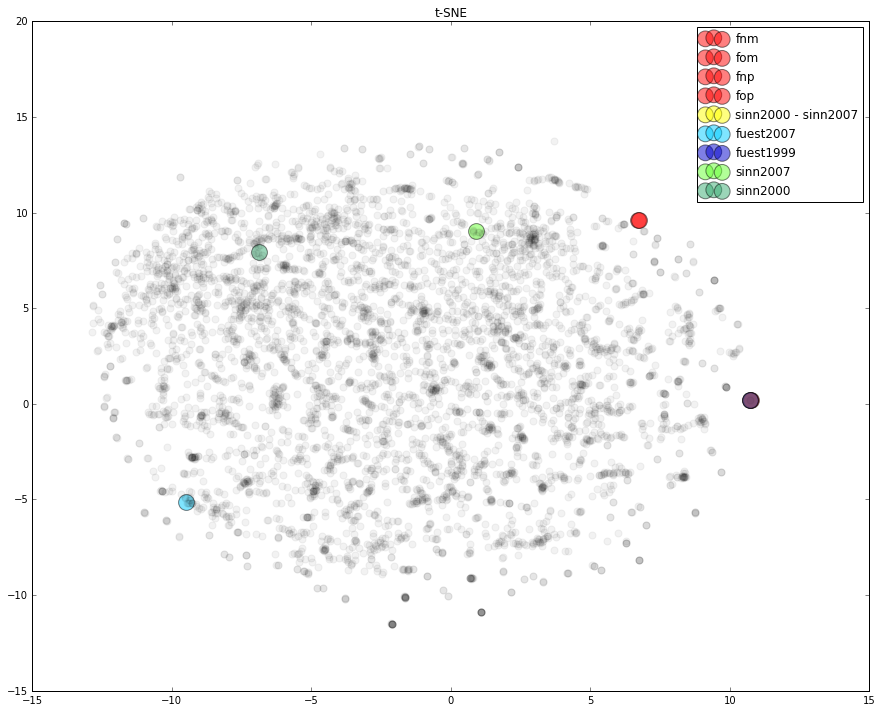

In [28]:
# t-SNE
%pylab inline
import matplotlib.pyplot as plt
from numpy.linalg import norm

tsneIfo = tsneDocs[:len(docVecsSmF), :]
tsneSamples = tsneDocs[len(docVecsSmF):, :]

handles = []
plt.figure(figsize=(15, 12), dpi=100)
for docVecs, c in zip(tsneIfo, docColors):
    handles.append(plt.scatter(docVecs[0], docVecs[1], s=250,\
                   c=c, alpha=.5, cmap=plt.cm.Spectral))

handles.append(plt.scatter(tsneSamples[:, 0], tsneSamples[:, 1], s=50, c='black',\
                           alpha=.05, cmap=plt.cm.Spectral))
plt.title("t-SNE")
plt.legend(handles, docVecsFmSMapping)

plt.show()

### Sinn's difference +/- Fuest's documents

In [33]:
sinnDiff = sinn2000 - sinn2007
fnm = fuest2007 - sinnDiff
fom = fuest1999 - sinnDiff
fnp = fuest2007 + sinnDiff
fop = fuest1999 + sinnDiff

docVecsFmS = [fnm, fom, fnp, fop, fuestDiff, fuest2007, fuest1999, \
                sinn2007, sinn2000]
docVecsFmSMapping = ['fnm', 'fom', 'fnp', 'fop', 'sinn2000 - sinn2007', \
                        'fuest2007', 'fuest1999', 'sinn2007', 'sinn2000']
docVecsFmSColors = ['red'] * 4 + ['yellow', 
                                     '#00ccff', # light blue
                                     '#0000cc', # blue
                                     '#66ff33', # light green
                                     '#39ac73'] # green

randomSamples = drawEmbeddingSamples(numSamples)

docs = docVecsFmS + randomSamples
docColors = docVecsFmSColors + ['black'] * numSamples

In [34]:
tsneDocs = tsne(docs)

Populating the interactive namespace from numpy and matplotlib


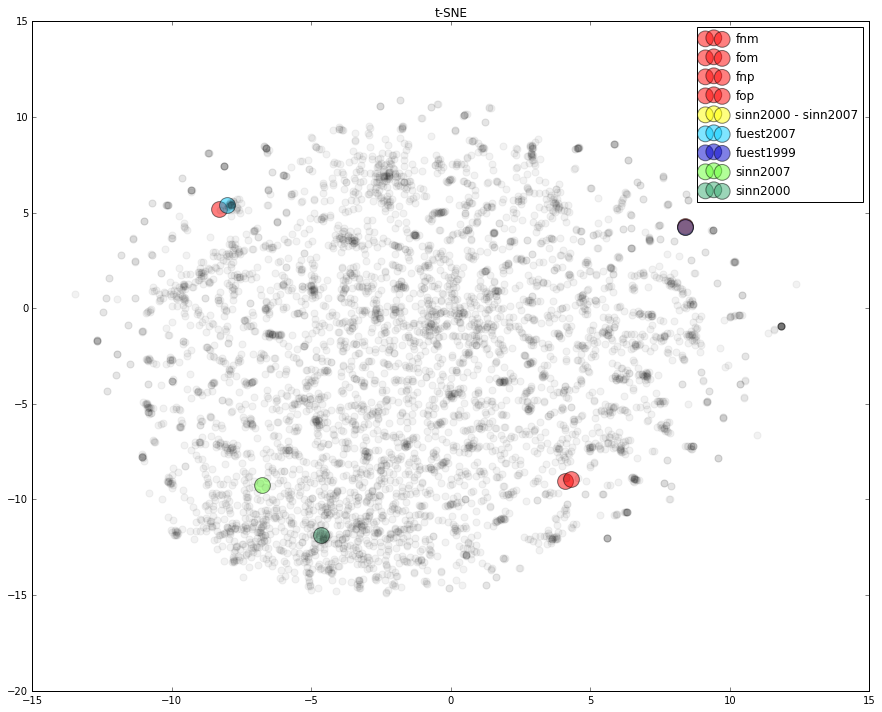

In [35]:
# t-SNE
%pylab inline
import matplotlib.pyplot as plt
from numpy.linalg import norm

tsneIfo = tsneDocs[:len(docVecsFmS), :]
tsneSamples = tsneDocs[len(docVecsFmS):, :]

handles = []
plt.figure(figsize=(15, 12), dpi=100)
for docVecs, c in zip(tsneIfo, docColors):
    handles.append(plt.scatter(docVecs[0], docVecs[1], s=250,\
                   c=c, alpha=.5, cmap=plt.cm.Spectral))

handles.append(plt.scatter(tsneSamples[:, 0], tsneSamples[:, 1], s=50, c='black',\
                           alpha=.05, cmap=plt.cm.Spectral))
plt.title("t-SNE")
plt.legend(handles, docVecsFmSMapping)

plt.show()

# Visualize 30% of the corpus after a t-SNE reduction

In [5]:
from loadCorpus import loadCorpus
from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

X, y = loadCorpus(dim=600)

INFO:root:start loading the model
INFO:gensim.utils:loading Doc2Vec object from /home/user/projekte/econstorModelling/cache/allDocs600D.model
INFO:gensim.utils:loading docvecs recursively from /home/user/projekte/econstorModelling/cache/allDocs600D.model.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/user/projekte/econstorModelling/cache/allDocs600D.model.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1 from /home/user/projekte/econstorModelling/cache/allDocs600D.model.syn1.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/user/projekte/econstorModelling/cache/allDocs600D.model.syn0.npy with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:root:loading completed
INFO:root:building corpus...
INFO:root:corpus complete


In [ ]:
# split data, to keep the computation feasible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
del X_train, y_train, X, y
tsne = TSNE(n_components=2, random_state=42)

x = tsne.fit_transform(X_test)

In [ ]:
%pylab inline
from matplotlib import pyplot as plt

plt.figure(figsize=[15, 12], dpi=100)
plt.scatter(x[:, 0], x[:, 1], s=50, alpha=0.05, c=y_test, cmap=plt.cm.Spectral)
plt.title("t-SNE")

plt.show()

# t-SNE by authors

In [228]:
topUSAuthors = {
    'James J. Heckman': {
        'color': '',
        'tsne': [],
        'docs': ["791344649.pdf.json",
            "wp03-04.pdf.json",
            "664338003.pdf.json",
            "dp8827.pdf.json",
            "728401312.pdf.json",
            "dp8027.pdf.json",
            "cesifo_wp1031.pdf.json",
            "dp8711.pdf.json",
            "dp7750.pdf.json",
            "732416388.pdf.json",
            "558854818.pdf.json",
            "wp03-13.pdf.json",
            "632184426.pdf.json",
            "632185252.pdf.json",
            "490361323.pdf.json",
            "cesifo_wp1014.pdf.json",
            "dp7550.pdf.json",
            "732553164.pdf.json",
            "66523810X.pdf.json",
            "362526656.pdf.json",
            "374816565.pdf.json",
            "dp7628.pdf.json",
            "490471781.pdf.json",
            "687928893.pdf.json",
            "484623192.pdf.json",
            "801006074.pdf.json",
            "717449475.pdf.json",
            "dp8200.pdf.json",
            "675944805.pdf.json",
            "dp9476.pdf.json",
            "wp02-02.pdf.json",
            "wp03-09.pdf.json",
            "801004721.pdf.json",
            "715979043.pdf.json",
            "665267223.pdf.json",
            "749691735.pdf.json",
            "632183454.pdf.json",
            "idb-wp_430.pdf.json",
            "716017407.pdf.json",
            "dp7552.pdf.json",
            "wp03-17.pdf.json",
            "pp17.pdf.json",
            "dp9247.pdf.json",
            "558856314.pdf.json",
            "727557017.pdf.json",
            "dp8548.pdf.json",
            "757433537.pdf.json",
            "dp8424.pdf.json",
            "659505134.pdf.json",
            "dp8338.pdf.json",
            "dp8696.pdf.json",
            "664348866.pdf.json",
            "663112346.pdf.json",
            "wp1408.pdf.json",
            "607538317.pdf.json",
            "362626855.pdf.json",
            "638495555.pdf.json"]
    },
    'Andrei Shleifer': {
        'color': '',
        'tsne': [],
        'docs': ["686834291.pdf.json",
            "NDL2002-074.pdf.json",
            "689692781.pdf.json"],
    },
    'Daron Acemoglu': {
        'color': '',
        'tsne': [],
        'docs': ["477687644.pdf.json",
            "686844475.pdf.json",
            "833124862.pdf.json",
            "dp9068.pdf.json",
            "612963969.pdf.json",
            "567037134.pdf.json",
            "dp7906.pdf.json",
            "cesifo_wp5366.pdf.json",
            "VfS_2010_pid_558.pdf.json"]
    },
    'Joseph E. Stiglitz': {
        'color': '',
        'tsne': [],
        'docs': ["640462014.pdf.json",
            "576782793.pdf.json",
            "309202949.pdf.json",
            "51214043X.pdf.json",
            "771928769.pdf.json",
            "826742238.pdf.json"]
    },
    'John Y. Campbell': {
        'color': '',
        'tsne': [],
        'docs': ["511909411.pdf.json",
            "78054143X.pdf.json",
            "688042902.pdf.json"]
    },
    'Olivier J Blanchard': {
        'color': '',
        'tsne': [],
        'docs': ["728651653.pdf.json",
            "527628174.PDF.json",
            "687613256.pdf.json",
            "kap1335.pdf.json",
            "505088495.pdf.json"]
    },
    'Thomas J. Sargent': {
        'color': '',
        'tsne': [],
        'docs': ["wp2003-14.pdf.json",
            "200528dkp.pdf.json",
            "wp2003-25.pdf.json",
            "383913152.PDF.json",
            "505119463.pdf.json",
            "wp481.pdf.json",
            "505119412.pdf.json",
            "wp2005-09.pdf.json",
            "82835975X.pdf.json",
            "wp2004-22.pdf.json",
            "591928027.pdf.json",
            "572292899.pdf.json"]
    }
}

In [229]:
import itertools
from loadCorpus import loadModel

try:
    if not isinstance(model, gensim.models.doc2vec.Doc2Vec):
        model = loadModel(dim=600)
except NameError:
    model = loadModel(dim=600)

corpus = drawEmbeddingSamples(num=5000, model=model)

# flatten the datastructure to obtain all documents' file names
topUSAuthorsDocs = itertools.chain(*(author['docs'] \
                                     for author in list(topUSAuthors.values())))
topUSAuthorsDocs = list(map(lambda x: x.replace(".json", ""), topUSAuthorsDocs))
topUSAuthorsDocEmbeddings = [model.docvecs[doc] for doc in topUSAuthorsDocs]

# merging samples and the selected docs
corpus = list(itertools.chain(topUSAuthorsDocEmbeddings, corpus))

In [230]:
tsneCorpus = tsne(corpus)

Populating the interactive namespace from numpy and matplotlib


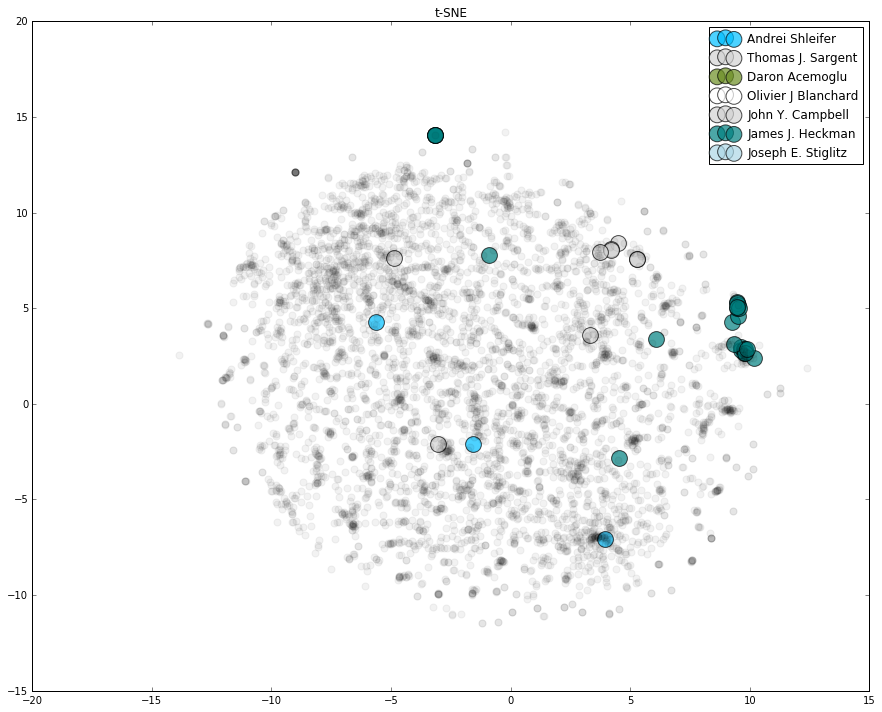

In [242]:
# plot the result
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

tsneUSAuthors = tsneCorpus[:len(topUSAuthorsDocs), :]
tsneSamples = tsneCorpus[len(topUSAuthorsDocs):, :]

# asign color to author and
# asign tsne representations to documents
docsProcessed = 0
for author, values in topUSAuthors.items():
    values['color'] = pickColors(N=1)
    
    numDocs = len(values['docs'])
    values['tsne'] = tsneUSAuthors[docsProcessed:numDocs]
    docsProcessed += numDocs
    
    
handles = []
plt.figure(figsize=(15, 12), dpi=100)
for author, values in topUSAuthors.items():
    handles.append(plt.scatter(values['tsne'][:, 0], values['tsne'][:, 1], s=250,\
                   c=values['color'], alpha=.7, cmap=plt.cm.Spectral))

handles.append(plt.scatter(tsneSamples[:, 0], tsneSamples[:, 1], s=50, c='black',\
                           alpha=.05, cmap=plt.cm.Spectral))
plt.title("t-SNE")
plt.legend(handles, [author for author in topUSAuthors.keys()])

plt.show()